#  Trabajo Práctico 5

    Integrantes: Alvarez Vico Jazmín LU: 75/15
                 Cortés Conde Titó Javier LU: 252/15
                 Frassia Fernando Nicolás LU: 340/13

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [30]:
def make_model(observed, thrown, n):
    my_model = pm.Model()
    with my_model:
        theta = pm.Beta('theta', n, n)
        likelihood = pm.distributions.discrete.Binomial('likelihood', thrown, theta, observed = observed)
        trace = pm.sample(500)
        
    
    return my_model, trace

def make_predictive_model(observed, thrown, n):
    my_model = pm.Model()
    with my_model:
        theta = pm.Beta('theta', n, n)
        likelihood = pm.distributions.discrete.Binomial('likelihood', thrown, theta, observed = observed)
        pred = pm.distributions.discrete.Binomial('likelihood_pred', 1, theta)
        trace = pm.sample(500)
        
    
    return my_model, trace


# Modelo 1

## 1. Implementacion

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 2309.92it/s]


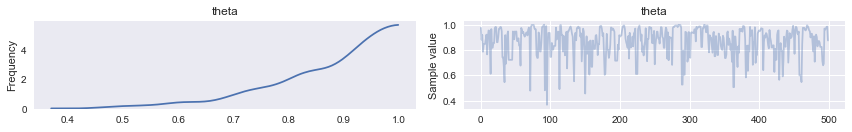

In [31]:
model_1, trace_1 = make_model(6, 6, 1)
pm.traceplot(trace_1)
plt.show()
    

## 2. Resumenes

100%|██████████| 500/500 [00:00<00:00, 5145.64it/s]


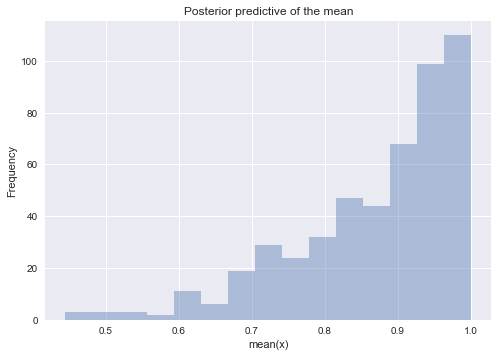

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 2299.89it/s]  

MAP de modelo 1:  0.9999984620831801


In [72]:
ppc = pm.sample_ppc(trace_1, samples = 500, model = model_1, size =100)
ax = plt.subplot()
sns.distplot([elem.mean()/6 for elem in ppc['likelihood']], kde=False, ax=ax)

ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()
one_map = pm.find_MAP(model=model_1)
print('MAP de modelo 1: ', one_map['theta'])

## 3. Prediccion

Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
100%|██████████| 1000/1000 [00:00<00:00, 1046.04it/s]


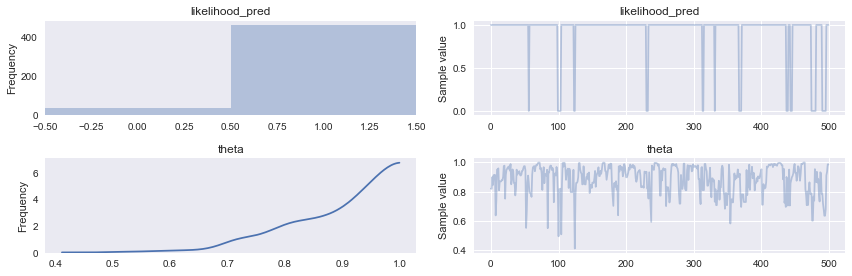

In [33]:
pred_model_1, pred_trace_1 = make_predictive_model(6, 6, 1)


pm.traceplot(pred_trace_1)
plt.show()

## 4. Otros datos.

### Modelo 'a' (20 caras de 20 tiradas).

#### I) Implementación.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1585.04it/s]


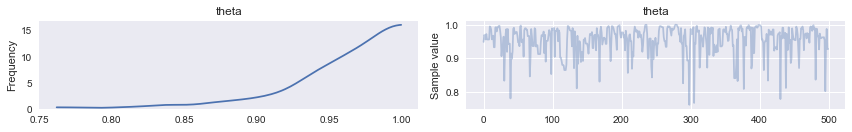

In [34]:
model_1a, trace_1a = make_model(20, 20, 1)
pm.traceplot(trace_1a)
plt.show()

#### II) Resúmenes.

100%|██████████| 500/500 [00:00<00:00, 4482.57it/s]


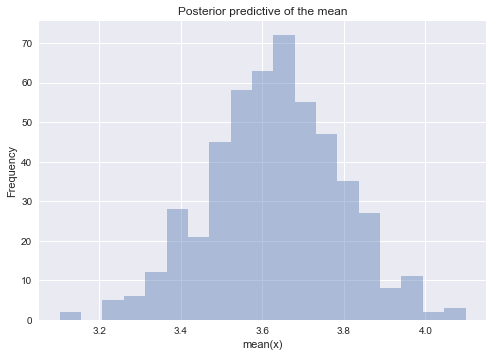

logp = -67.132, ||grad|| = 50: 100%|██████████| 6/6 [00:00<00:00, 1498.14it/s]

MAP de modelo 1a:  0.7252252306130911


In [71]:
ppc = pm.sample_ppc(trace_1a, samples = 500, model = model_1a, size =100)
ax = plt.subplot()
sns.distplot([elem.mean()/20 for elem in ppc['likelihood']], kde=False, ax=ax)

ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()
one_map = pm.find_MAP(model=model_1a)
print('MAP de modelo 1a: ', one_map['theta'])

#### III) Predicción.

Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
 89%|████████▊ | 887/1000 [00:00<00:00, 981.02it/s]/home/javier/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1000/1000 [00:01<00:00, 994.99it/s]


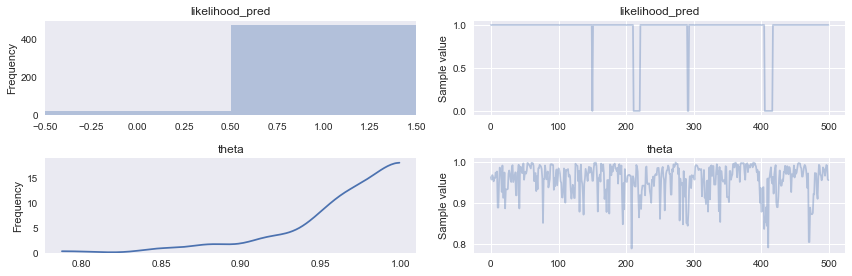

In [36]:
pred_model_1a, pred_trace_1a = make_predictive_model(20, 20, 1)

pm.traceplot(pred_trace_1a)
plt.show()

### Modelo 'b' (3 caras de 3 tiradas).

#### I) Implementación.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 2327.77it/s]


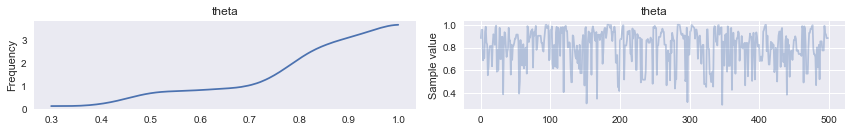

In [37]:
model_1b, trace_1b = make_model(3, 3, 1)
pm.traceplot(trace_1b)
plt.show()

#### II) Resúmenes.

100%|██████████| 500/500 [00:00<00:00, 3878.03it/s]


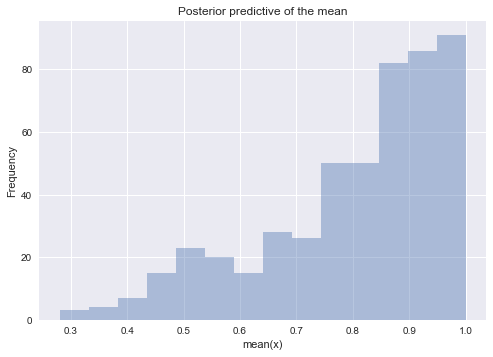

logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 1860.52it/s]  

MAP de modelo 1b:  0.999996924163579


In [70]:
ppc = pm.sample_ppc(trace_1b, samples = 500, model = model_1b, size =100)
ax = plt.subplot()
sns.distplot([elem.mean()/3 for elem in ppc['likelihood']], kde=False, ax=ax)

ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()
one_map = pm.find_MAP(model=model_1b)
print('MAP de modelo 1b: ', one_map['theta'])

#### III) Predicción.

Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
 96%|█████████▋| 965/1000 [00:00<00:00, 1067.10it/s]/home/javier/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.894996295223, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 1000/1000 [00:00<00:00, 1064.19it/s]


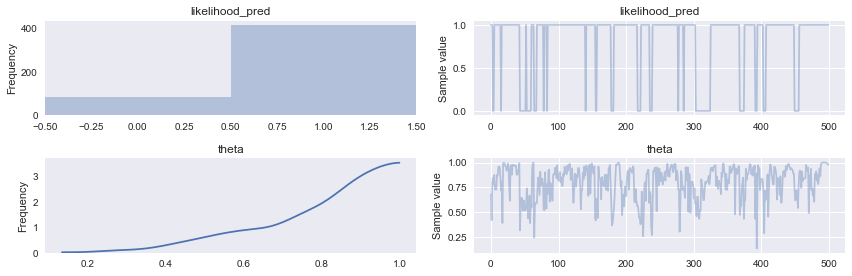

In [39]:
pred_model_1b, pred_trace_1b = make_predictive_model(3, 3, 1)

pm.traceplot(pred_trace_1b)
plt.show()

### 4. Concluciones.

Elegir un prior beta(1,1) equivale a suponer que no se sabe nada de la moneda. En ambos casos (observar 20 caras de 20 tiradas y 3 de 3) el MAP y las medias de las posteriors nos indican que el theta posterior (la probabilidad de que la moneda de cara) es muy alto, con un map mayor a 0,999 en ambos casos y una frecuencia media de theta superando 0,7. Esto nos indica que con el modelo que suponemos (beta(1,1)) y con las observaciones que hicimos la moneda tiene altas probabilidades de estar cargada. Vale aclarar que la probabilidad de que este cargada cuando se observaron 20 caras es mayor que la probabilidad de que este cargada cuando se observaron 3 caras, pero aún así nuestro modelo previo hace que ambas observaciones nos digan que esta cargada.

# Modelo 2

## 1. Implementacion

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 2494.50it/s]


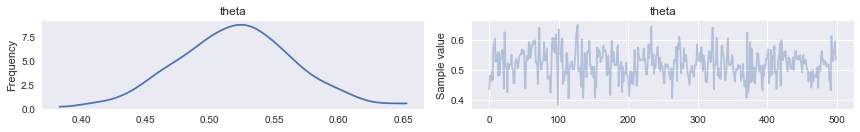

In [40]:
model_2, trace_2 = make_model(6, 6, 63)
pm.traceplot(trace_2)
plt.show()
    

## 2. Resumenes

100%|██████████| 500/500 [00:00<00:00, 5134.84it/s]


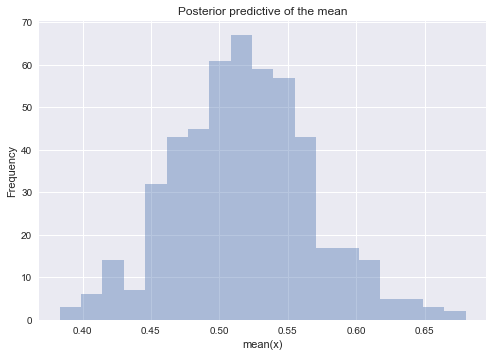

logp = -1.9685, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 2430.54it/s]

MAP de modelo 2:  0.5230769230359584


In [69]:
ppc = pm.sample_ppc(trace_2, samples = 500, model = model_2, size =100)
ax = plt.subplot()
sns.distplot([elem.mean()/6 for elem in ppc['likelihood']], kde=False, ax=ax)

ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()
one_map = pm.find_MAP(model=model_2)
print('MAP de modelo 2: ', one_map['theta'])

## 3. Prediccion

Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
100%|██████████| 1000/1000 [00:00<00:00, 1085.82it/s]


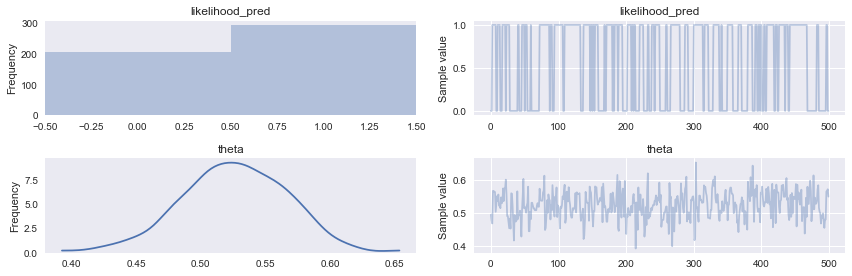

In [42]:
pred_model_2, pred_trace_2 = make_predictive_model(6, 6, 63)


pm.traceplot(pred_trace_2)
plt.show()

## 4. Otros Datos

### Modelo a.

#### I) Implementación.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 2061.61it/s]


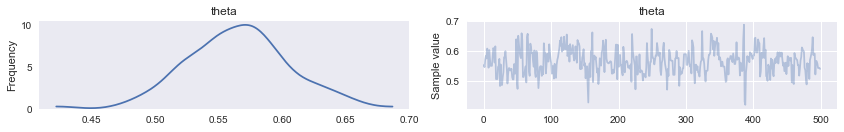

In [56]:
model_2a, trace_2a = make_model(20, 20, 63)
pm.traceplot(trace_2a)
plt.show()
    

#### II) Resúmenes.

100%|██████████| 500/500 [00:00<00:00, 4450.29it/s]


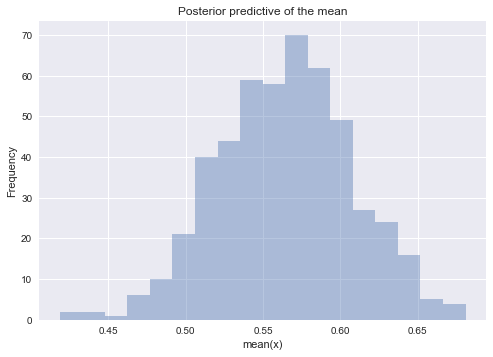

logp = -11.673, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 2489.20it/s]

MAP de modelo 2a:  0.5694444426539484


In [67]:
ppc = pm.sample_ppc(trace_2a, samples = 500, model = model_2a, size =100)
ax = plt.subplot()
sns.distplot([elem.mean()/20 for elem in ppc['likelihood']], kde=False, ax=ax)

ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()
one_map = pm.find_MAP(model=model_2a)
print('MAP de modelo 2a: ', one_map['theta'])

#### III) Predicción.

Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
100%|██████████| 1000/1000 [00:00<00:00, 1118.97it/s]


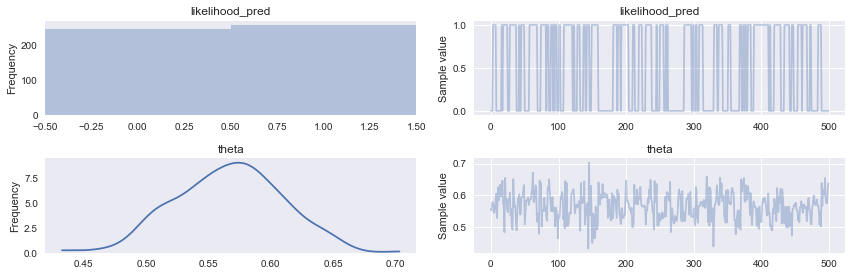

In [61]:
pred_model_2a, pred_trace_2a = make_predictive_model(20, 20, 63)


pm.traceplot(pred_trace_2a)
plt.show()

### Modelo b.
#### I) implementación.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 2451.78it/s]


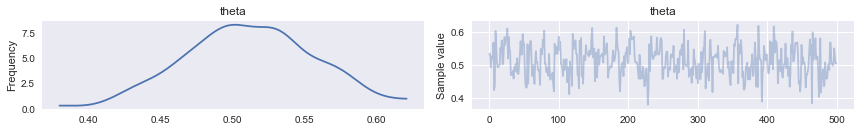

In [59]:
model_2b, trace_2b = make_model(3, 3, 63)
pm.traceplot(trace_2b)
plt.show()

#### II) Resúmenes.

100%|██████████| 500/500 [00:00<00:00, 5523.11it/s]


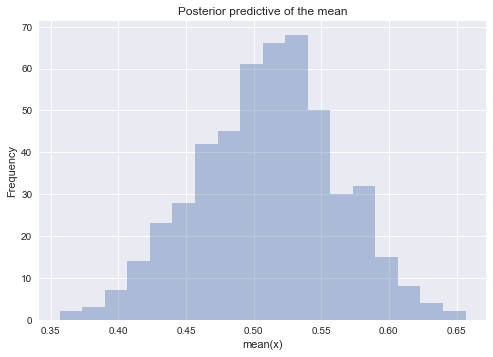

logp = 0.11093, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<00:00, 1130.59it/s]

MAP de modelo 1:  0.5118110236200925


In [68]:
ppc = pm.sample_ppc(trace_2b, samples = 500, model = model_2b, size =100)
ax = plt.subplot()
sns.distplot([elem.mean()/3 for elem in ppc['likelihood']], kde=False, ax=ax)

ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()
one_map = pm.find_MAP(model=model_2b)
print('MAP de modelo 1: ', one_map['theta'])

#### III) Predicción.

Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
100%|██████████| 1000/1000 [00:00<00:00, 1059.85it/s]


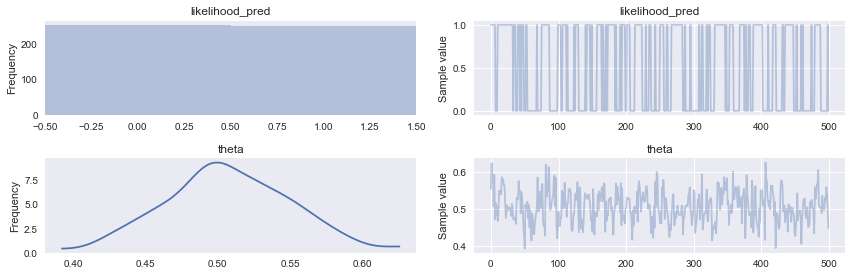

In [60]:
pred_model_2b, pred_trace_2b = make_predictive_model(3, 3, 63)

pm.traceplot(pred_trace_2b)
plt.show()

### 4. Concluciones.

Elegir un prior beta(63,63) no solo equivale a suponer que la moneda no esta cargada, sino que confiamos en que no lo este.  Con un MAP de 0,569 al observar 20 caras y 0,511 al observar 3 caras. y las frecuencias respondiendo a normales centradas en esos valores. A diferencia del otro, que nos indicaba fuertemente que la moneda estaba cargada, en este caso tenemos que decidir cual es el umbral para decir que una moneda esta cargada o no, nosotros elegimos que nuestro umbral sea un MAP de 0,6. Nuestra intuición dice que tirar 20 caras de 20 tiradas indican fuertemente que la moneda esta cargada, pero elegimos usar un modelo que confia en que la moneda no esta cargada y por eso no vamos a ajustar el umbral para que ese caso indique que la moneda esta cargada, lo que tendríamos que ajustar es el modelo sobre el cual hacer los análisis.

Resumiendo, los dos modelos son muy extremos al modelar (confiando demasiado en la moneda o no asumiendo nada). Esto nos deja casos donde nos gustaría que el modelo prediga una cosa, pero predice lo contrario.

## 5. Prior

Teniendo en cuenta el umbral pensado en el punto anterior y que uno sospecharía que la moneda esta cargada cuando el reslutado de la moneda realmente importa, creemos que 8 caras de 8 tiradas es un motivo de sospecha. por eso vamos a buscar nuestro n tal que el MAP del modelo con 8 caras de 8 tiradas de mayor que 0,6 pero el MAP del modelo con 7 caras de 7 tiradas de menor que 0,6.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 2442.67it/s]
logp = -4.0787, ||grad|| = 4: 100%|██████████| 6/6 [00:00<00:00, 1614.64it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 2370.89it/s]
logp = -3.3856, ||grad|| = 3.5: 100%|██████████| 6/6 [00:00<00:00, 1549.24it/s]


MAP de modelo beta(15,15) (8 caras):  0.6111111108038395
MAP de modelo beta(15,15) (7 caras):  0.599999998833611
modelo beta(15,15) (8 caras)


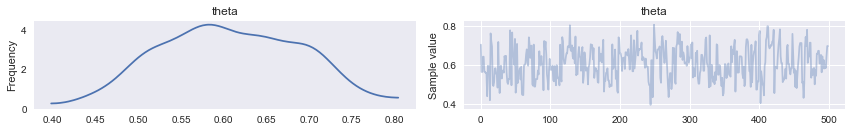

modelo beta(15,15) (7 caras)


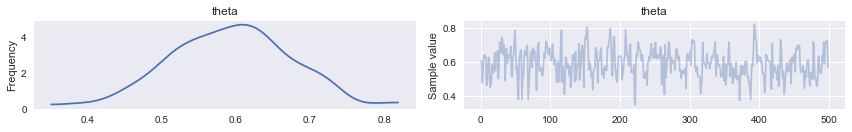

predecir con el modelo beta(15,15) (8 caras)


Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
100%|██████████| 1000/1000 [00:01<00:00, 999.35it/s]


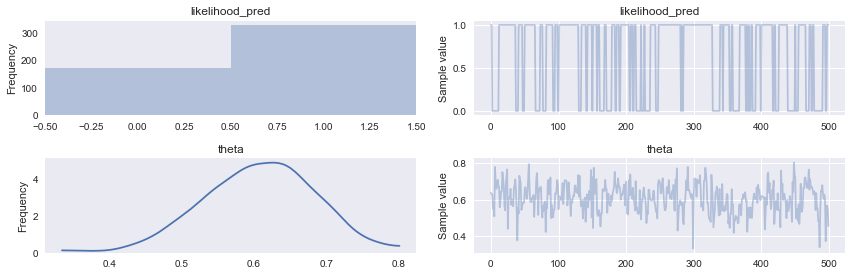

predecir con el modelo beta(15,15) (7 caras)


Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
100%|██████████| 1000/1000 [00:00<00:00, 1095.10it/s]


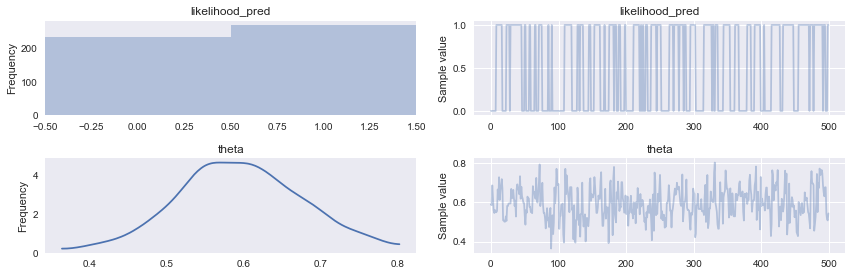

In [98]:
n = 15
mon = 8
model_1a, trace_1a = make_model(mon, mon, n)

one_map = pm.find_MAP(model=model_1a)

model_1b, trace_1b = make_model(mon - 1 , mon - 1, n)

one_mapb = pm.find_MAP(model=model_1b)
print('MAP de modelo beta('+str(n)+','+str(n)+') (8 caras): ', one_map['theta'])
print('MAP de modelo beta('+str(n)+','+str(n)+') (7 caras): ', one_mapb['theta'])

print('modelo beta('+str(n)+','+str(n)+') (8 caras)')
pm.traceplot(trace_1a)
plt.show()

print('modelo beta('+str(n)+','+str(n)+') (7 caras)')
pm.traceplot(trace_1b)
plt.show()

print('predecir con el modelo beta('+str(n)+','+str(n)+') (8 caras)')
pred_model_2a, pred_trace_2a = make_predictive_model(mon, mon, n)

pm.traceplot(pred_trace_2a)
plt.show()

print('predecir con el modelo beta('+str(n)+','+str(n)+') (7 caras)')

pred_model_2b, pred_trace_2b = make_predictive_model(mon-1, mon-1, n)

pm.traceplot(pred_trace_2b)
plt.show()


Por como se definio el umbral, el modelo responde a nuestras necesidades, pero tiene sus falencias que son facilmente distinguibles.

1) el umbral es completamente arbitrario.

2) la diferencia entre el MAP de 7 caras contra el de 8, es de 0,02 lo cual parece no solo una diferencia despreciable, sino tambien remarca la arbitrariedad de nuestro umbral.

Aún asi tambien podemos notar como nuestro modelo, al observar 8 caras, predice que la proxima moneda va a ser cara con mayor frecuencia a cuando predice que va a ser seca(con una diferencia notable). En cambio cuando se observan 7 caras el modelo predice con casi la misma fercuencia cualquiera de los dos casos.